In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate # circuit Library gates (hadamard and multi-CNOT)

In [3]:
mcx_gate = MCXGate(3) # 3-qubits being controlled by 4th qubit
hadamard_gate = HGate()

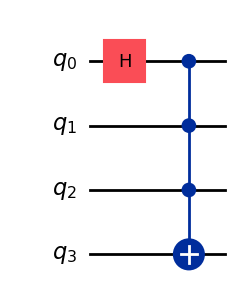

In [4]:
qc = QuantumCircuit(4) # circuit with 4 quantum registers
qc.append(hadamard_gate, [0]) # hadamard on first qubit
qc.append(mcx_gate, [0, 1, 2, 3]) # mcx on all 4 qubits
qc.draw('mpl') # Draw the circuit

### n_local circuits alternate between a layer of single qubit gates and layers of 2-qubit entangling gates like so

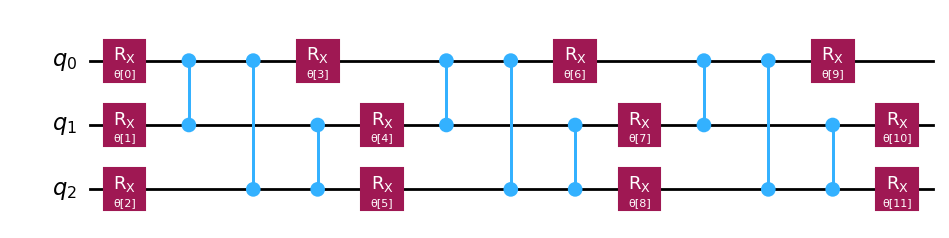

In [5]:
from qiskit.circuit.library import n_local

two_local = n_local(3, 'rx', 'cz')
two_local.draw('mpl')

In [ ]:
two_local.parameters # Returns list-like object that describes the circuit's rotation parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11])])

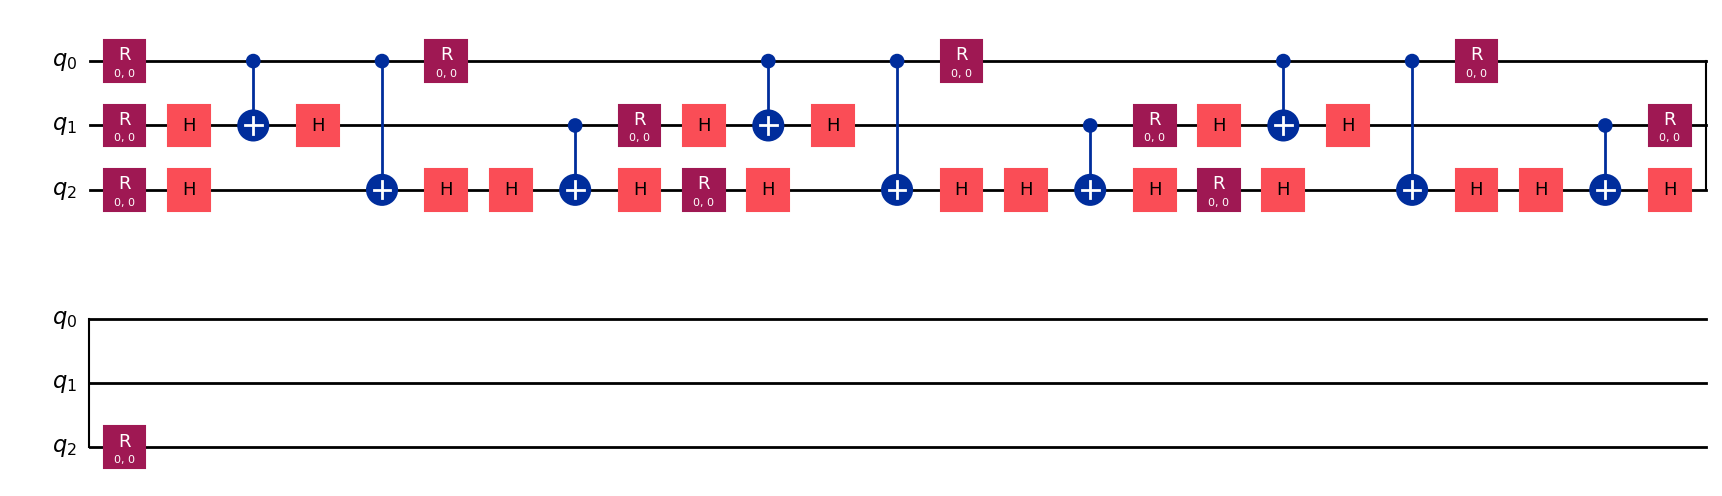

In [7]:
# Assign all rotation parameters to 0
bound_circuit = two_local.assign_parameters(
    {p: 0 for p in two_local.parameters}
)
bound_circuit.decompose().draw('mpl')

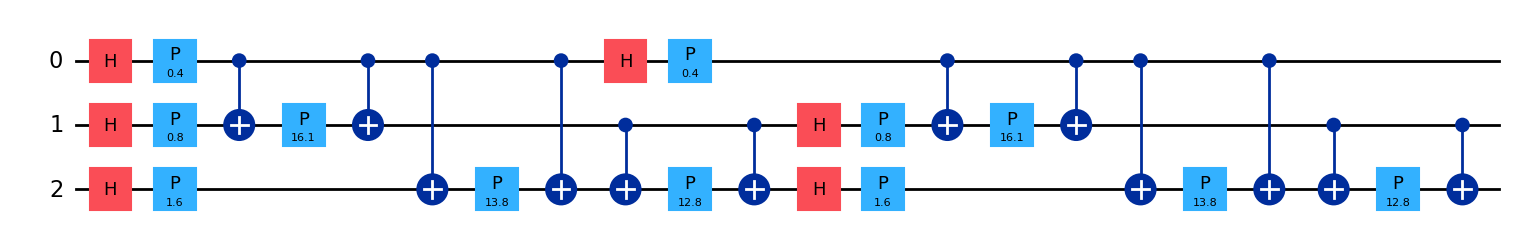

In [8]:
# angle-encoding circuit
from qiskit.circuit.library import zz_feature_map

features = [0.2, 0.4, 0.8] # angles
feature_map = zz_feature_map(feature_dimension=len(features)) # make a feature map with the features

encoded = feature_map.assign_parameters(features)
encoded.draw('mpl')

## Time evolution circuits

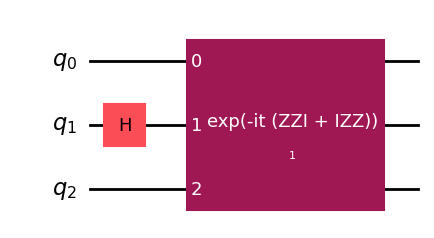

In [10]:
# simulate a quantum state that evolves with time (heat transfer or phase transitions)
# fundamental to QAOA!

from qiskit.circuit.library import PauliEvolutionGate # evolution gate
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp # Pauli operations

# let's prepare an initial state with a hadamard on the middle qubit
state = QuantumCircuit(3)
state.h(1)

# let's create the hamiltonian and turn it into an evolution gate
hamiltonian = SparsePauliOp(['ZZI', 'IZZ'])
evolution = PauliEvolutionGate(hamiltonian, time=1)

# evolve state by appending the evolution gate
state.compose(evolution, inplace=True)

state.draw('mpl')

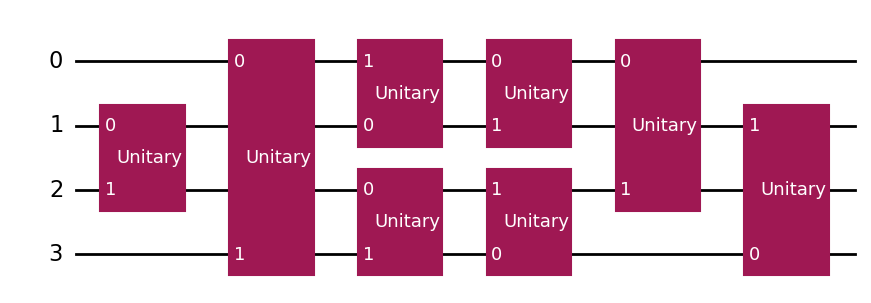

In [11]:
# benchmarking circuits

from qiskit.circuit.library import quantum_volume # benchmark for arbitrary quantum circuit execution accuracy

quantum_volume(4).draw('mpl')

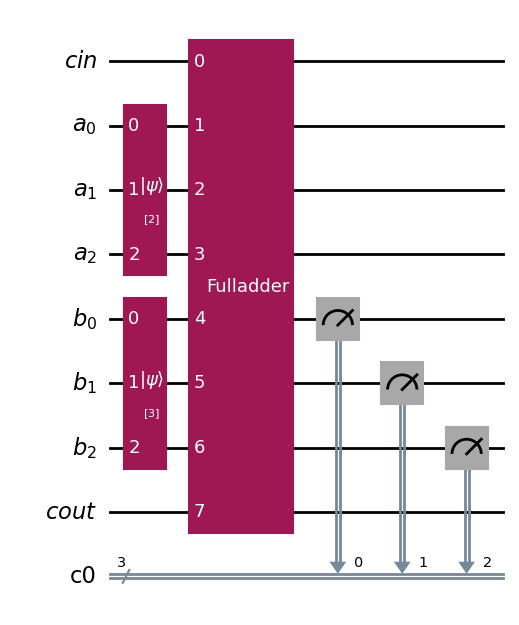

In [12]:
# arithmetic circuits

from qiskit.circuit.library import FullAdderGate
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

adder = FullAdderGate(3) # adds 3-bit numbers

# Create number A and set it to 2
reg_a = QuantumRegister(3, 'a')
number_a = QuantumCircuit(reg_a) # 3-qubit circuit
number_a.initialize(2) # Initialize to 2 (|010>)

# Create number B and set it to 3
reg_b = QuantumRegister(3, 'b')
number_b = QuantumCircuit(reg_b)
number_b.initialize(3) # Initialize to 3 (|011>)

# Create a circuit to hold these numbers (quantum registers) and the result (classical register)
q_regs = [
    QuantumRegister(1, "cin"), # 1 qubit cin
    QuantumRegister(3, "a"), # 3 qubits A
    QuantumRegister(3, "b"), # 3 qubits B
    QuantumRegister(1, "cout") # 1 qubit cout
]
result_reg = ClassicalRegister(3) # 3 bits result
circuit = QuantumCircuit(*q_regs, result_reg)

# Compose number init circuits with the adder circuit
circuit = (
    circuit.compose(number_a, qubits=reg_a) # Prepare number A
    .compose(number_b, qubits=reg_b) # Prepare number B
    .compose(adder) # Runs adder on A and B
)
circuit.measure(reg_b, result_reg) # measures result (from B's registers) and stores in result_reg

circuit.draw('mpl')


In [13]:
# Run some shots to check if the answer is indeed 5 (|101>)
from qiskit.primitives import StatevectorSampler

result = StatevectorSampler().run([circuit]).result()

print(f"Counts after 1024 shots (should be 1024 5's): {result[0].data.c0.get_int_counts()}")

Counts after 1024 shots (should be 1024 5's): {5: 1024}
